# <font size="5"><center><b>TP1 Organización de Datos - Cátedra Collinet</b></center></font>
<center><b>Informe reducido para presentación oral</b></center>

    
**Alumnos**:
- Elián Daniel Foppiano
- Felipe de Luca Andrea
 
**Correctora:** Sofía Morseletto

[**Consigna**](https://github.com/orga-de-datos/practicas/blob/master/tps/2021-2c-tp/2021-2c-tp-parte1.md)

# Bibliotecas utilizadas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import math
from datetime import date
from os.path import exists
from IPython.display import display_html
import random
sns.set()
pd.set_option('display.max_columns', 25)

In [2]:
if not exists("datasets/df_features.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv"
    ) as r, open("datasets/df_features.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

if not exists("datasets/df_target.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv"
    ) as r, open("datasets/df_target.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_target = pd.read_csv("datasets/df_target.csv", low_memory=False)
df_features = pd.read_csv("datasets/df_features.csv", low_memory = False)
df = df_features.merge(df_target, on = 'id')
df.set_index("id", inplace=True)

df.rename(columns={"velocidad_viendo_tarde": "velocidad_viento_tarde",
          "velocidad_viendo_temprano": "velocidad_viento_temprano"}, inplace=True)
df_original = df.copy()
df.head()

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
86942,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,no,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
102098,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,no,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
67154,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,no,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
50245,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,no,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
82904,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,no,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no


# Colores utilizados

In [3]:
sns.color_palette("tab20")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [4]:
colores = sns.color_palette("tab20")
pares_colores = {
    "azul": colores[0:2],
    "naranja": colores[2:4],
    "verde": colores[4:6],
    "rojo": colores[6:8],
    "violeta": colores[8:10],
    "marron": colores[10:12],
    "rosa": colores[12:14],
    "gris": colores[14:16],
    "amarillo": colores[16:18],
    "celeste": colores[18:20]
}

paleta = {
    "temperatura": {
        "elementos": ["temp_min","temp_max","temperatura_tarde","temperatura_temprano"],
        "par_colores": pares_colores["naranja"]
    },
    "humedad": {
        "elementos": ["humedad_tarde", "humedad_temprano"],
        "par_colores": pares_colores["verde"]
    },
    "presion_atmosferica": {
        "elementos": ["presion_atmosferica_tarde", "presion_atmosferica_temprano"],
        "par_colores": pares_colores["violeta"]
    },
    "viento": {
        "elementos": ["direccion_viento_temprano", "direccion_viento_tarde", "velocidad_viento_tarde", "velocidad_viento_temprano"],
        "par_colores": pares_colores["rojo"]
    },
    "viento_rafaga_max": {
        "elementos": ["rafaga_viento_max_direccion", "rafaga_viento_max_velocidad"],
        "par_colores": pares_colores["rosa"]
    },
    "nubosidad": {
        "elementos": ["nubosidad_tarde", "nubosidad_temprano"],
        "par_colores": pares_colores["azul"]
    },
    "lluvia": {
        "elementos" : ["mm_evaporados_agua", "mm_lluvia_dia"],
        "par_colores" : pares_colores["celeste"]
    },
    "dia": {
        "elementos" : ["dia"],
        "par_colores" : pares_colores["gris"]
    },
    "barrio": {
        "elementos": ["barrio"],
        "par_colores": pares_colores["amarillo"]
    },
    "horas_de_sol": {
        "elementos": ["horas_de_sol"],
        "par_colores": pares_colores["marron"]
    }
}

def get_par_colores(feature):
    for categoria in paleta:
        if feature in paleta[categoria]["elementos"]:
            return paleta[categoria]["par_colores"]

# ¿Cómo son los datos a analizar? ¿Hay filas mal cargadas?

El primer paso para analizar el dataframe, fue observar los tipos de dato de cada columna, detectar filas con errores al cargar los datos, y determinar la forma en que dichas filas serían tratadas.

Se encontraron filas con datos mal cargados en las columnas ***presion_atmosferica_tarde*** (números invalidos), ***nubosidad_temprano*** y ***nubosidad_tarde*** (nubosidad de 9). En total, eran 5 filas, y decidimos simplemente dropearlas, ya que eran muy pocas, y un tratamiento sofisticado para corregir los datos no valdría el esfuerzo.

In [5]:
df.replace({'llovieron_hamburguesas_hoy': {"si": 1, "no": 0},
           'llovieron_hamburguesas_al_dia_siguiente': {"si": 1, "no": 0 }},
           inplace = True)
df.llovieron_hamburguesas_al_dia_siguiente.astype(np.float64, copy=False)
df.llovieron_hamburguesas_hoy.astype(np.float64, copy=False)

df = df.astype({
    "barrio": "category",
    "direccion_viento_tarde": "category",
    "direccion_viento_temprano": "category",
    "rafaga_viento_max_direccion": "category"
})

df.dia = pd.to_datetime(df.dia)

def f(row):
    try:
        float(row['presion_atmosferica_tarde'])
    except:
        indices_con_error.append(row.name)

df = df.astype({'presion_atmosferica_tarde' : str})
indices_con_error = []
df.apply(f, axis=1)
df.drop(indices_con_error, inplace=True, errors="ignore")
df['presion_atmosferica_tarde'] = df['presion_atmosferica_tarde'].astype(np.float64)

df.drop(labels=df[df.nubosidad_temprano == 9].index, inplace=True)
df.drop(labels=df[df.nubosidad_tarde == 9].index, inplace=True)

In [6]:
df.dtypes.to_frame("Tipo de dato")

,Tipo de dato
barrio,category
dia,datetime64[ns]
direccion_viento_tarde,category
direccion_viento_temprano,category
horas_de_sol,float64
humedad_tarde,float64
humedad_temprano,float64
llovieron_hamburguesas_hoy,float64
mm_evaporados_agua,float64
mm_lluvia_dia,float64


In [7]:
variables_numericas = [
    "temp_min",
    "temp_max",
    "temperatura_tarde",
    "temperatura_temprano",
    "presion_atmosferica_tarde",
    "presion_atmosferica_temprano",
    "nubosidad_tarde",
    "nubosidad_temprano",
    "velocidad_viento_tarde",
    "velocidad_viento_temprano",
    "rafaga_viento_max_velocidad",
    "nubosidad_tarde",
    "nubosidad_temprano",
    "mm_evaporados_agua",
    "mm_lluvia_dia",
    "horas_de_sol",
]
variable_booleana = "llovieron_hamburguesas_hoy"
variables_categoricas = [
    "barrio",
    "direccion_viento_tarde",
    "direccion_viento_temprano",
    "rafaga_viento_max_direccion"
]
variable_fecha = "dia"
variable_target = "llovieron_hamburguesas_al_dia_siguiente"

# ¿Cómo se distribuyen los missings? ¿Están relacionados? ¿Podemos dropear filas?

Observamos que los datos faltantes estaban representados como NaN. Luego, graficamos el porcentaje de missings por cada feature

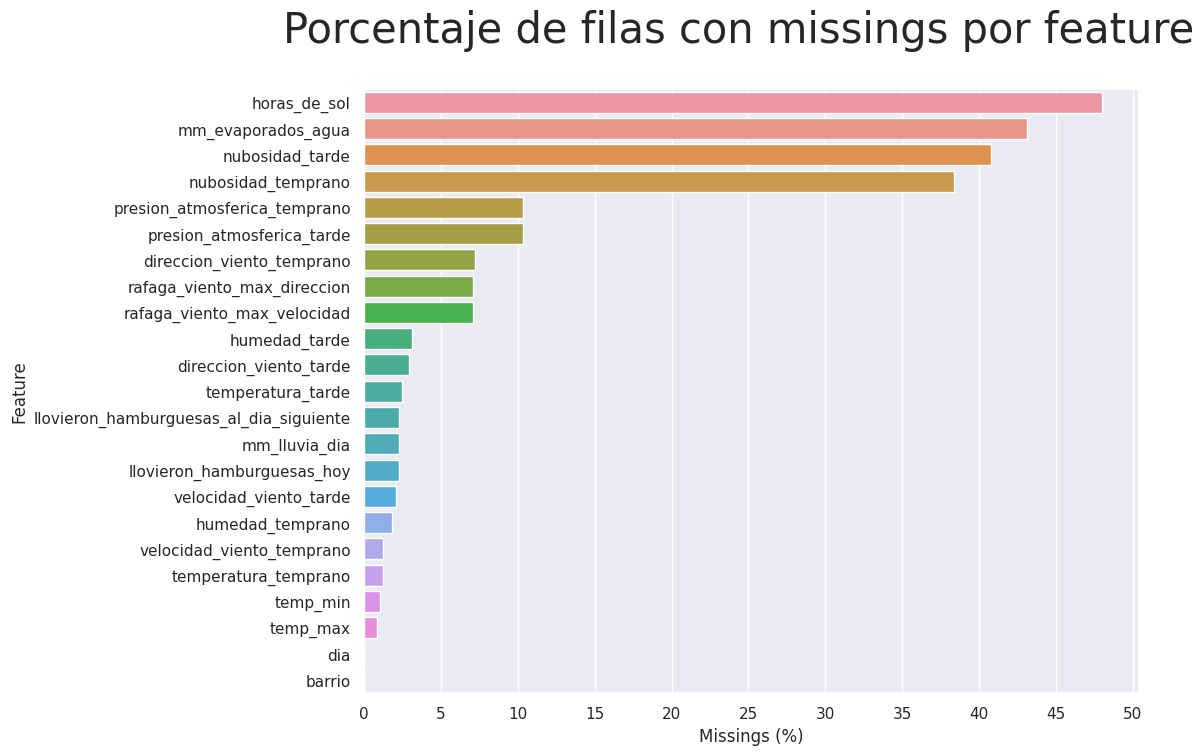

In [8]:
def plot_missings(dataframe):
    fig, ax = plt.subplots(figsize=(10,8), dpi = 100)
    fig.suptitle("Porcentaje de filas con missings por feature", fontsize=30)
    
    sns.barplot(
        data=(dataframe.isna().mean() * 100)
            .sort_values(ascending=False)
            .to_frame("Missings (%)")
            .reset_index()
            .rename(columns={"index": "Feature"}),
        x="Missings (%)",
        y="Feature",
        ax=ax
    )
    ax.set_xticks(range(0, 55,5))
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Feature")
    plt.show()
    
plot_missings(df)

Descubrimos que, para categorías relacionadas, la cantidad de missings es similar, excepto en algunos casos.

Encontramos que, en muchos casos, los missings presentan un patrón de Missing At Random, tal y como se ve en el siguiente gráfico, a modo de ejemplo

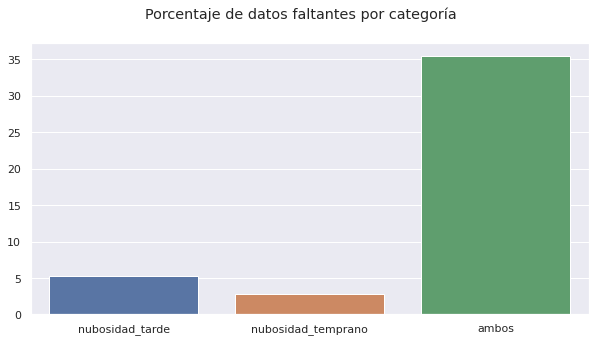

In [9]:
def mostrar_relacion_faltantes(ax, feature1, feature2):
    faltan_en_uno = df[feature1].isna().mean() * 100
    faltan_en_otro = df[feature2].isna().mean() * 100
    faltan_en_ambos = (df[feature1].isna() & df[feature2].isna()).mean() * 100
    y = [faltan_en_uno - faltan_en_ambos, faltan_en_otro - faltan_en_ambos, faltan_en_ambos]
    x = [feature1, feature2, "ambos"]
    sns.barplot(
        ax=ax,
        x=x,
        y=y,
    )

fig, ax = plt.subplots(figsize=(10,5))
mostrar_relacion_faltantes(ax, "nubosidad_tarde", "nubosidad_temprano")
    
fig.suptitle("Porcentaje de datos faltantes por categoría")
plt.show()

Lamentablemente, esta relación dificulta muchísimo la posibilidad de salvar los missings de una feature con los datos de la otra.

Por otro lado, no encontramos alguna relación entre los missings y el valor de la variable target.

En cuanto a la posibilidad de dropear filas con missings, se analizó, pero preferimos mantener todas las filas, y trabajar cada análisis de forma particular, siempre teniendo en cuenta aquellas features en las cuales el porcentaje de missings es elevado, para no llegar a conclusiones erróneas.

# ¿Cómo se distribuyen los valores de la variable target?

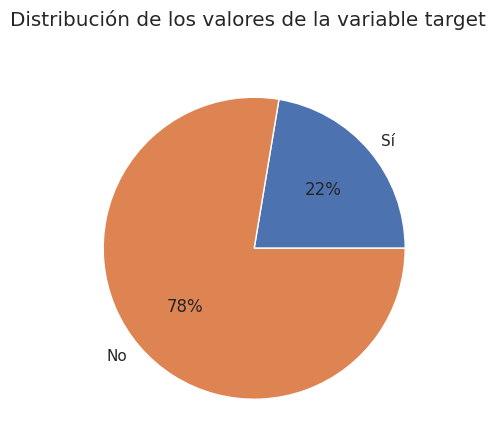

In [10]:
distribucion_target = df.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True)
llovio_al_dia_siguiente = distribucion_target.loc[1]
no_llovio_al_dia_siguiente = distribucion_target.loc[0]

fig, ax = plt.subplots(dpi=100, figsize=(5,5))
fig.suptitle("Distribución de los valores de la variable target")
ax.pie(
    [llovio_al_dia_siguiente, no_llovio_al_dia_siguiente],
    labels=["Sí", "No"],
    autopct='%1.0f%%',
)
plt.show()

Vemos claramente que los valores no están distribuidos de manera uniforme. Esto tiene sentido ya que, en Argentina, la cantidad de días con lluvia es mucho menor a la cantidad de días sin lluvia.

Este análisis resultará sumamente útil al definir la función baseline, ya que nos indica un piso de accuracy mínimo que deberá cumplir. Este valor es de 78%, y correspondería a una baseline que devuelva 'no' de manera incondicional. Toda baseline con accuracy inferior a este valor, será mala.

# ¿Cómo se distribuyen los valores de las variables?

Las features presentaron una distribución razonable en la mayoría de los casos, con pocos outliers.

Las excepciones fueron para las variables ***mm_evaporados_agua*** y ***mm_lluvia_dia***, en las cuales observamos una gran cantidad de outliers

In [11]:
print(f"Cuantil 99.5% de mm_evaporados_agua: {df.mm_evaporados_agua.quantile(0.995) : .2f}")
print(f"Cuantil 99.5% de mm_lluvia_dia: {df.mm_lluvia_dia.quantile(0.995) : .2f}")

Cuantil 99.5% de mm_evaporados_agua:  22.85
Cuantil 99.5% de mm_lluvia_dia:  53.40


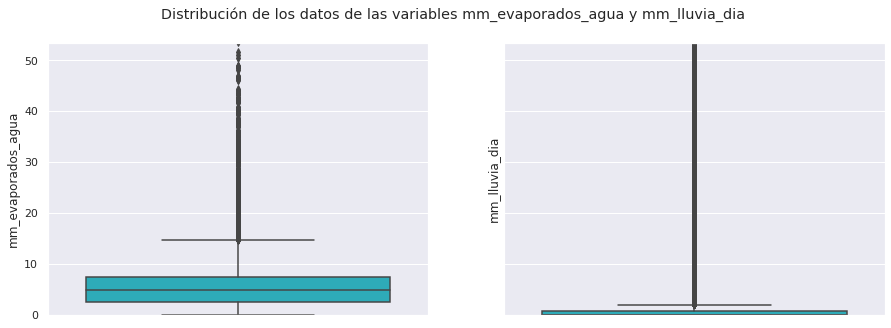

In [12]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.boxplot(y = df.mm_evaporados_agua, ax = axs[0], color = get_par_colores("mm_evaporados_agua")[0])
sns.boxplot(y = df.mm_lluvia_dia, ax = axs[1], color = get_par_colores("mm_lluvia_dia")[0])
axs[0].set_ylim(0, 53.4)
axs[1].set_ylim(0, 53.4)

fig.suptitle("Distribución de los datos de las variables mm_evaporados_agua y mm_lluvia_dia")
plt.show()

Sin embargo, esto no quiere decir que los datos están mal cargados. Por el contrario, tiene sentido que los días en que no llovió, ***mm_lluvia_dia*** valga 0.

Otras anomalías encontradas fueron, por ejemplo, la falta de una dirección del viento en las variables categóricas ***direccion_viento_tarde***, ***direccion_viento_temprano*** y ***rafaga_viento_max_direccion***.

# ¿Hay variables que tengan un coeficiente de correlación alto?

Un coeficiente de correlación alto indicaría que dos variables tienen dependencia lineal, lo cual podría ser una oportunidad para combinar features en el futuro, y así reducir las dimensiones del dataset. Los pares de variables con mayor correlación fueron ***temp_max*** y ***temperatura_tarde***

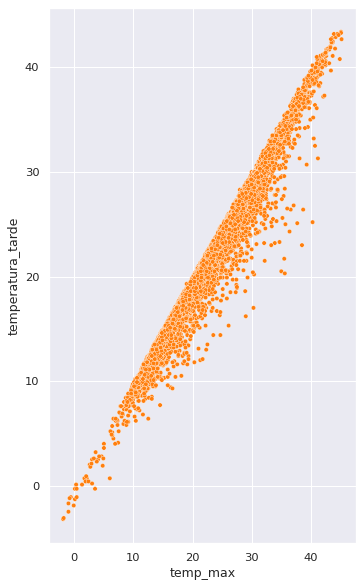

In [13]:
fig, ax = plt.subplots(figsize=(5,8))
fig.set_dpi(75)
sns.scatterplot(
    x="temp_max",
    y="temperatura_tarde",
    ax=ax,
    color=paleta["temperatura"]["par_colores"][0],
    data=df.sample(10000, random_state=0),
    size=1,
    legend=False
)

plt.tight_layout()
plt.show()

# ¿Están relacionadas las variables mm_lluvia_dia y llovieron_hamburguesas_hoy?

Sospechamos que dichas variables probablemente estén relacionadas. Luego de analizar los datos vimos que, efectivamente, existe una dependencia completa de la segunda variable respecto de la primera

In [14]:
prom_lluvia_con_pocos_mm = df[df.mm_lluvia_dia <= 1].llovieron_hamburguesas_hoy.mean()
print(f"Porcentaje de casos con mm_lluvia_dia <= 1 en los que llovio hoy: {prom_lluvia_con_pocos_mm * 100}%")
prom_lluvia_con_muchos_mm = df[df.mm_lluvia_dia > 1].llovieron_hamburguesas_hoy.mean()
print(f"Porcentaje de casos con mm_lluvia_dia > 1 en los que llovio hoy: {prom_lluvia_con_muchos_mm * 100}%")

Porcentaje de casos con mm_lluvia_dia <= 1 en los que llovio hoy: 0.0%
Porcentaje de casos con mm_lluvia_dia > 1 en los que llovio hoy: 100.0%


Por lo tanto, decidimos dropear la columna, ya que no contiene información real.

In [15]:
df.drop(columns=["llovieron_hamburguesas_hoy"], inplace=True, errors="ignore")

# Relación con la variable target

Los resultados de esta sección que hayamos usado en la baseline están en negrita.

## ¿Cómo afecta la dirección del viento a la lluvia?

Para ver esto, decidimos representar cada dirección del viento como un ángulo. Ignoramos aquellas que no tienen la dirección especificada.
Graficamos la distribución de samples en cada dirección en general y con la variable target.

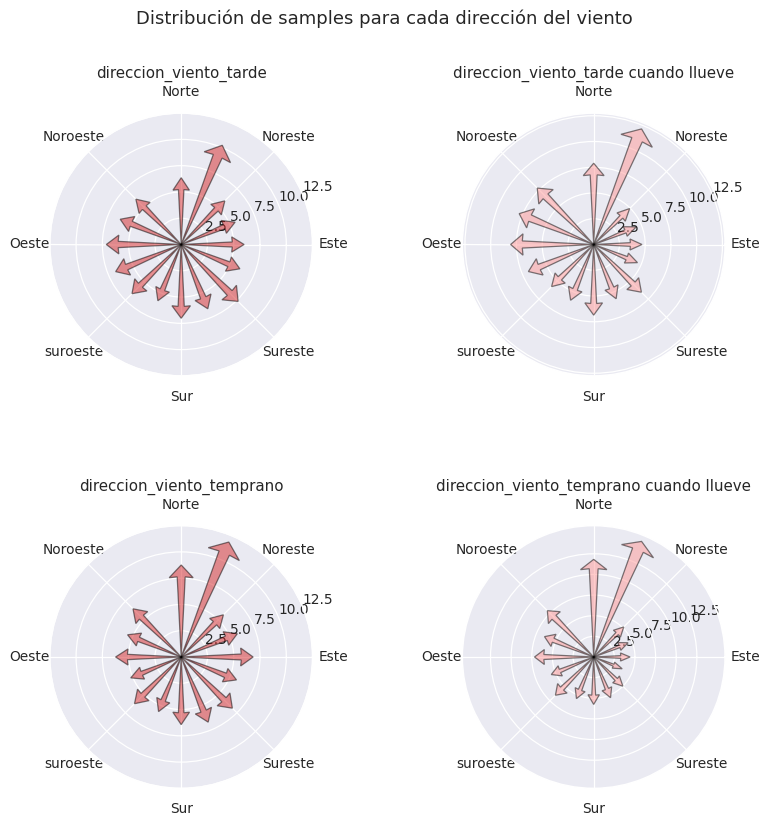

In [16]:
direcciones = {
        'Norte' : 4*np.pi/8,
        'Nornoreste' : 3*np.pi/8,
        'Noreste' : 2*np.pi/8,
        'Estenoreste' : np.pi/8,
        'Este' : 0,
        'Estesureste' : 15*np.pi/8,
        'Sureste' : 14*np.pi/8,
        'Sursureste' : 13*np.pi/8,
        'Sur' : 12*np.pi/8,
        'Sursuroeste' : 11*np.pi/8,
        'suroeste' : 10*np.pi/8,
        'Oestesuroeste' : 9*np.pi/8,
        'Oeste' : 8*np.pi/8,
        'Oestenoroeste' : 7*np.pi/8,
        'Noroeste' : 6*np.pi/8,
        'Nornoroeste' : 5*np.pi/8,
}

def graficar_viento(feature, ax, filtrar_target = False):
    if filtrar_target:
        cont = df[df[variable_target] == 1][feature].value_counts(normalize = True)
        ax.set_title(feature + " cuando llueve")
    else:
        cont = df[feature].value_counts(normalize = True)
        ax.set_title(feature)
        
    for direccion in direcciones:
        if direccion in cont:
            arr = ax.arrow(direcciones[direccion], 0, 0, cont[direccion] * 40, alpha = 0.5, width = 0.1, 
            edgecolor = 'black', length_includes_head = True, facecolor = get_par_colores(feature)[1 if filtrar_target else 0])
    ax.set_yticks(range(1, 6))
    ax.set_yticklabels([2.5*i for i in range(1, 6)]) # Para ajustar la escala de nuevo a la correcta y ponerlo en %
    ax.set_xticks([i*np.pi/4 for i in range(8)])
    ax.set_xticklabels(sorted(direcciones.keys(), key = lambda x: direcciones[x])[::2])

fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), dpi = 90, figsize = (10, 10))
graficar_viento("direccion_viento_tarde", ax = axs[0][0])
graficar_viento("direccion_viento_temprano", ax = axs[1][0])
graficar_viento("direccion_viento_tarde", ax = axs[0][1], filtrar_target = True)
graficar_viento("direccion_viento_temprano", ax = axs[1][1], filtrar_target = True)
plt.tight_layout(pad = 5)
plt.suptitle("Distribución de samples para cada dirección del viento")
plt.show()

Podemos notar que no parece haber una gran diferencia cuando llueve hamburguesas que cuando no. Pareciera que en ambos casos disminuyeron levemente los vientos en dirección entre Sur y Este y aumentaron las más cercanas al Norte, pero no parece ser un cambio muy significativo como para considerarlo relevante.

## ¿Cómo varían las distintas features numéricas cuando llueven hamburguesas al día siguiente?

Hicimos un Box Plot de cada variable numérica y notamos que las variables de **horas_de_sol**, así como las de **humedad** y **nubosidad**, son las más relacionadas con la variable target a primera vista.

Podemos entonces hacer un gráfico de densidad diferenciando entre cuando llueve y cuando no para esas features:

In [17]:
def graf_dens_continua(feature, ax, df_c):
    df_llovio = df[df[variable_target] == 1]
    df_no_llovio = df[df[variable_target] == 0]
    sns.kdeplot(
        x=feature,
        data=df_c[df_c[feature] < df_c[feature].quantile(0.9)],
        ax = ax,
        palette = get_par_colores(feature),
        hue_order=["Sí", "No"],
        hue = variable_target,
        common_norm=False,
    ).legend(["No", "Sí"]).set_title("¿Llovió?")
    ax.set_yticklabels([])
    ax.set_xlim(left = df_c[feature].min())
    ax.set_xlim(right = df_c[feature].max())
    
def graf_dens_discreta(feature, ax, df_c, bins = "auto"):
    sns.histplot(
        data=df_c,
        x=feature,
        hue=variable_target,
        palette=get_par_colores(feature),
        ax=ax,
        hue_order=["Sí", "No"],
        bins=bins,
        discrete=True,
        multiple="dodge",
        kde_kws={"legend_out": True},
        shrink = 0.8,
        common_norm=False,
        stat = 'density',
    ).legend(["No", "Sí"]).set_title("¿Llovió?")
    
def graf_cant(feature, ax, df_c, discreta=False, bins="auto", separar = False):
    sns.histplot(
        data=df_c,
        x=feature,
        hue=variable_target,
        palette=get_par_colores(feature),
        ax=ax,
        hue_order=["Sí", "No"],
        bins=bins,
        discrete=discreta,
        multiple="dodge" if discreta or separar else "layer",
        kde_kws={"legend_out": True},
        shrink = 0.8 if discreta or separar else 1
    ).legend(["No", "Sí"]).set_title("¿Llovió?")
    ax.set_xlim(left = df_c[feature].min() - (0.5 if discreta or separar else 0))
    ax.set_xlim(right = df_c[feature].max() + (0.5 if discreta or separar else 0))

def graficar_diferencia_target(feature, discreta = False, bins="auto"):
    df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
    fig, axs = plt.subplots(1, 2, figsize=(20,5), sharex = True)

    if discreta:
        graf_dens_discreta(feature, axs[0], df_c)
    else:
        graf_dens_continua(feature, axs[0], df_c)

    graf_cant(feature, axs[1], df_c, discreta, bins)

    axs[0].set_title(f"Densidad de {feature}\nsegún variable target")
    axs[1].set_title(f"Cantidad de {feature}\nsegún variable target")

    plt.plot()

Aclaración: Los gráficos de la izquierda de la siguiente sección representan la densidad de cada feature según la variable target por separado. Es decir, son densidades distintas independientes una de otra.

### Horas de sol

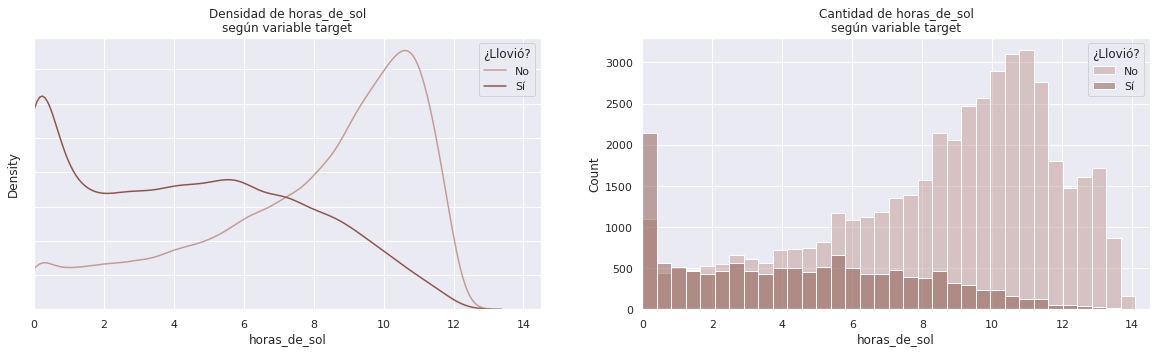

In [18]:
graficar_diferencia_target("horas_de_sol", bins=35)

Como hay tantos samples donde no llueve al día siguiente, la cantidad total de samples en las que llueve y no llueve con pocas horas de sol es similar, pero en general aquellos días en los que va a llover al día siguiente tienden a tener pocas horas de sol.
La mayor diferencia se nota con **horas de sol entre 0 y 1**, donde ya la densidad de casos positivos tiene un pico e incluso hay más samples positivos con esa condición en el dataset que negativos.

Podemos ver también que **si las horas de sol son mayores a 8, solo en el 7% de los casos llueve al día siguiente**.

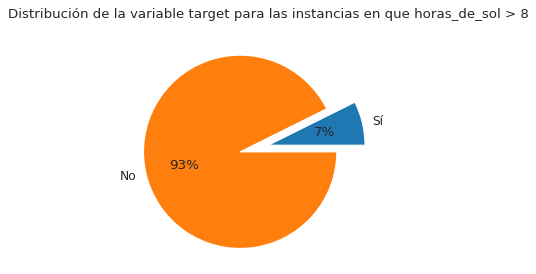

In [19]:
df_mucho_sol = df[df.horas_de_sol > 8]
df_si = (df_mucho_sol == 1).mean()[variable_target]
df_no = (df_mucho_sol == 0).mean()[variable_target]

plt.figure(dpi=80)
plt.pie([df_si, df_no],
       labels=["Sí", "No"],
       explode=(0, 0.3),
       colors=sns.color_palette("tab10", 2),
       autopct='%1.0f%%',
       normalize=True)

plt.title("Distribución de la variable target para las instancias en que horas_de_sol > 8")
plt.show()

In [20]:
print(f"Porcentaje de instancias que son clasificadas por este criterio: {len(df_mucho_sol) / len(df) * 100 : .1f}%")

Porcentaje de instancias que son clasificadas por este criterio:  27.8%


Este criterio resulta ser útil para clasificar un buen porcentaje de las muestras.

### Humedad tarde

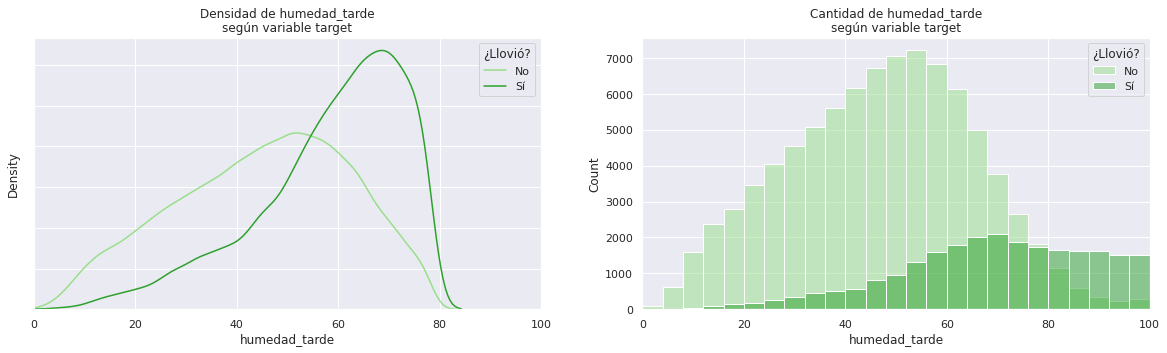

In [21]:
graficar_diferencia_target("humedad_tarde", bins=25)

Nuevamente podemos notar una relación bastante clara, donde aquellos samples donde no hay lluvia al día siguiente tienden a concentrarse cerca de los 50 de humedad mientras que donde sí llueve alrededor de los 70 o más.
**A partir de humedad alrededor de 80, ya empiezan a ser más los casos con lluvia al día siguiente que los que no.**

También podemos considerar que **con humedades menores a 60 la cantidad de días que llueve es mucho menor a los que no**:

In [22]:
df_filt = df[(df.humedad_tarde < 60)]
print(f"Porcentaje de días que no llueve con humedad menor a 60:\
{df_filt.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True).get(0)*100 : .2f}%")

Porcentaje de días que no llueve con humedad menor a 60: 89.85%


### Nubosidad tarde

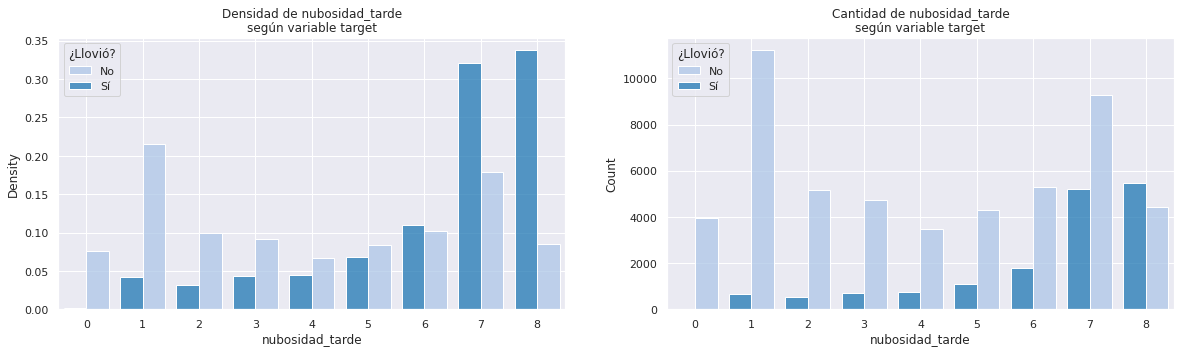

In [23]:
graficar_diferencia_target("nubosidad_tarde", discreta = True)

Otra vez podemos encontrar una relación con la variable target muy rápidamente. Los días que no llueve tienden a tener una nubosidad más baja que los días en los que llueve.
Podemos notar que **para los días con nubosidad de 8, hay más samples en los que llueve al día siguiente que en los que no** (aunque la diferencia no es tan significativa), y aparentemente **no hay ningún día en el que llueva al día siguiente con nubosidad 0**.

### Presión atmosférica

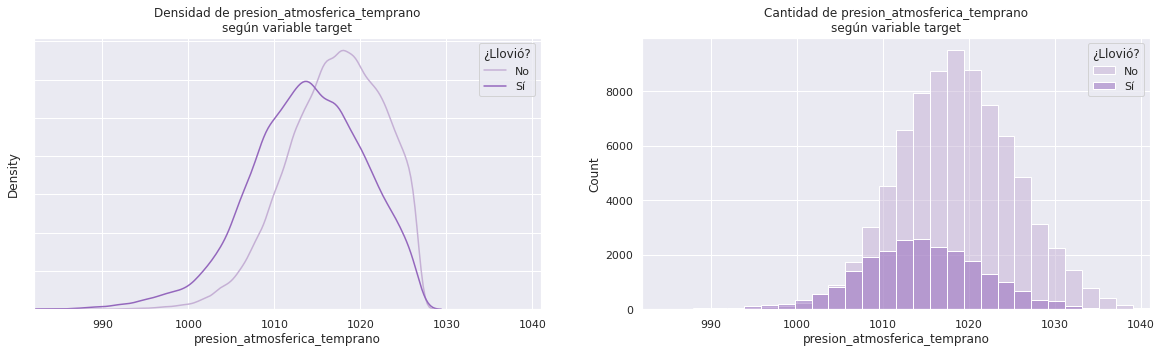

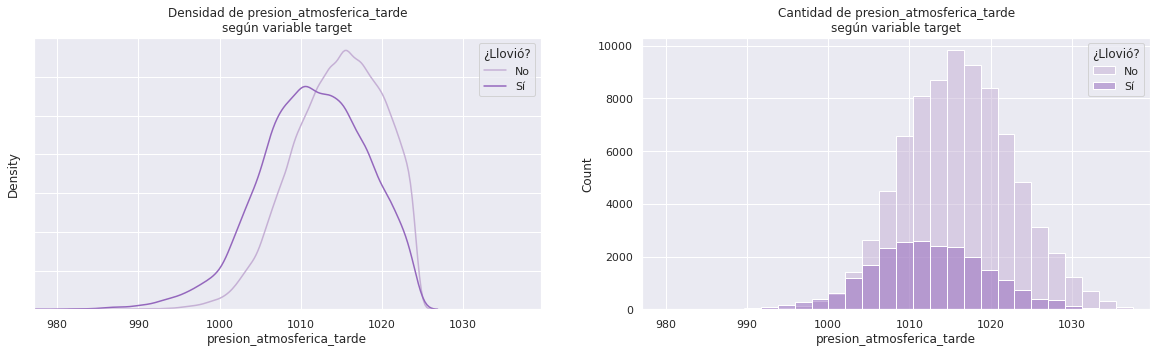

In [24]:
graficar_diferencia_target("presion_atmosferica_temprano", bins = 30)
graficar_diferencia_target("presion_atmosferica_tarde", bins = 30)

Para el caso de la presión, esta tiende a ser levemente menor cuando va a haber lluvia al día siguiente. Se puede apreciar levemente en los gráficos que para presiones menores a 1000 parecería ser superior la cantidad de veces que llovió que las que no. Podemos hacer un poco de zoom en los gráficos de la derecha:

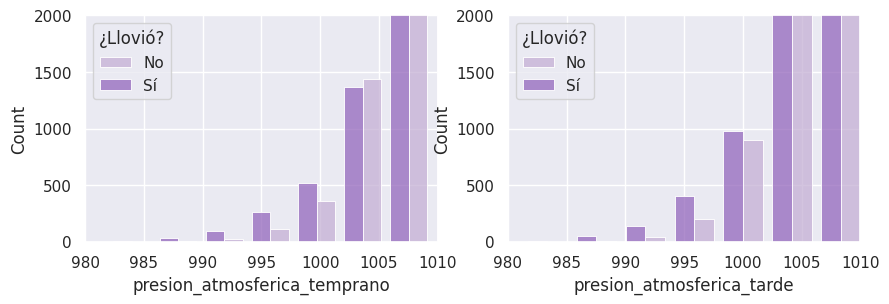

In [25]:
df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
fig, axs = plt.subplots(1, 2, dpi=100, figsize=(10,3))
graf_cant("presion_atmosferica_temprano", axs[0], df_c, bins = 15, separar = True)
graf_cant("presion_atmosferica_tarde", axs[1], df_c, bins = 15, separar = True)
axs[0].set_xlim((980, 1010))
axs[0].set_ylim((0,2000))
axs[1].set_xlim((980, 1010))
axs[1].set_ylim((0,2000))
plt.show()

En efecto, aproximadamente **para presiones menores a 1000 suele ser superior la cantidad de samples en las que llovió al día siguiente.** De todas formas no es un dato muy significante ya que la cantidad total de puntos que cumplen esto es bastante reducida.

### Ráfaga viento

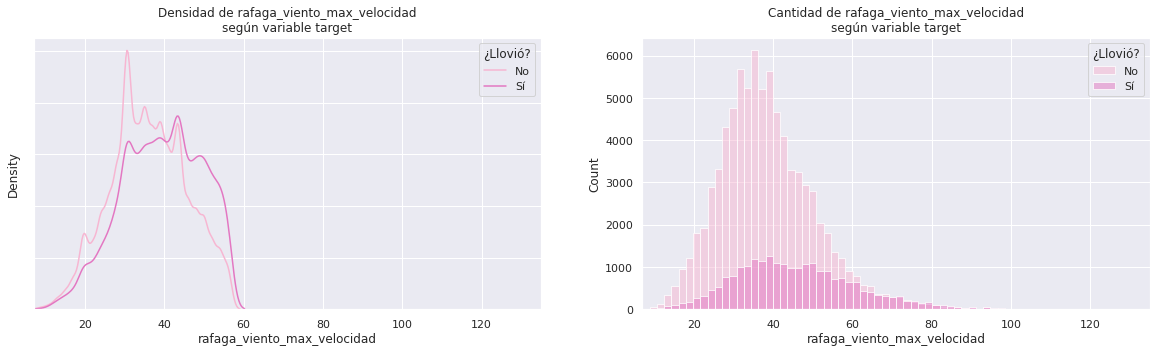

In [26]:
graficar_diferencia_target("rafaga_viento_max_velocidad", bins = 70)

A partir del gráfico de densidad podemos ver que los días positivos tienen una máxima velocidad más alta en promedio. Haciendo zoom en el de la derecha:

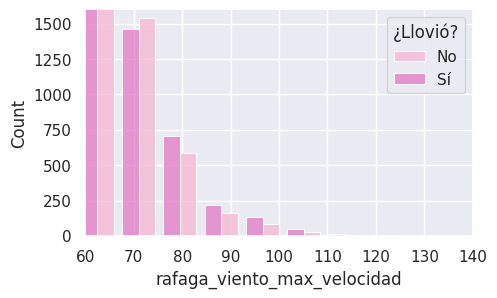

In [27]:
df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(5,3))
graf_cant("rafaga_viento_max_velocidad", ax, df_c, bins = 15, separar = True)
ax.set_xlim((60, 140))
ax.set_ylim((0, 1600))
plt.show()

Podemos ver que **para valores mayores a 80 hay más filas donde llovió al día siguiente que para aquellos que no**.

### Milimetros de lluvia

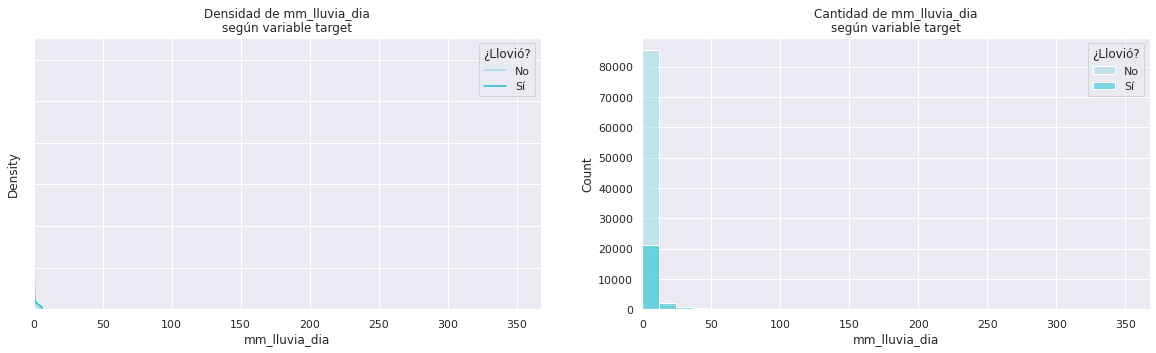

In [28]:
graficar_diferencia_target("mm_lluvia_dia", bins = 30)

Lamentablemente no se puede apreciar mucho en el gráfico ya que para la gran mayoría de los samples no llovió. Haciendo un poco de zoom en el de la derecha:

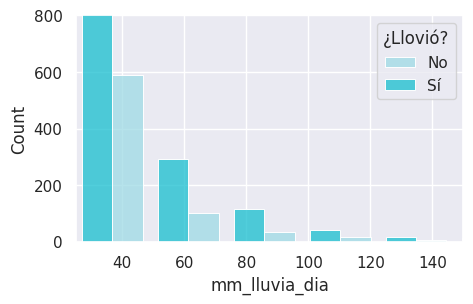

In [29]:
df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(5,3))
graf_cant("mm_lluvia_dia", ax, df_c, bins = 15, separar = True)
ax.set_xlim((25, 150))
ax.set_ylim((0, 800))
plt.show()

Podemos ver que a partir de alrededor de **30 milimetros de lluvia hay más samples en las que llueve hamburguesas al día siguiente que en las que no**.

## ¿Hay variables con relaciones que afecten al target?

Podemos también hacer algunos scatters plot de variables que parecen relacionadas para ver si notamos algun patrón cuando llueven hamurguesas.

In [30]:
def graficar_scatter(pareja, dataframe, puntos_extra = None):
    plt.figure(dpi=100)
    df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
    sns.scatterplot(
        x=pareja[0],
        y=pareja[1],
        hue='llovieron_hamburguesas_al_dia_siguiente',
        data=df_c,
        alpha=0.7,
        size=1,
        palette=get_par_colores(pareja[0]),
        hue_order=["Sí", "No"],
    ).legend(["No", "Si"]).set_title("Llovio?")

    plt.xlabel(pareja[0])
    plt.ylabel(pareja[1])
    
    if puntos_extra is not None:
        plt.plot(puntos_extra[0], puntos_extra[1], color = 'red')
    
    plt.show()

### Temperaturas

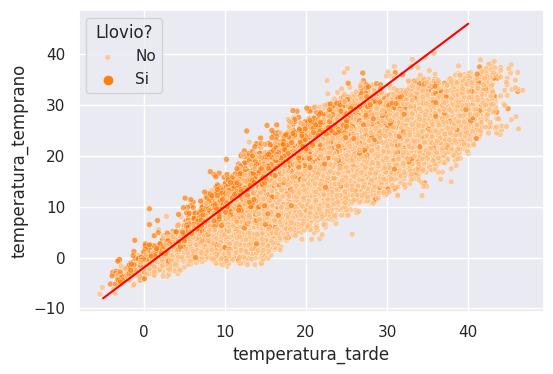

In [31]:
x = np.linspace(-5, 40, 3)
y = 1.2*x - 2

graficar_scatter(('temperatura_tarde', 'temperatura_temprano'), df, (x, y))

In [32]:
cant_no = len(df[(df.temperatura_temprano > 1.2*df.temperatura_tarde - 2) & (df[variable_target] == 0)])
cant_si = len(df[(df.temperatura_temprano > 1.2*df.temperatura_tarde - 2) & (df[variable_target] == 1)])

print(f"Cantidad de samples positivos por encima de la recta: {cant_si}")
print(f"Cantidad de samples negativos por encima de la recta: {cant_no}")
print(f"Relación: {cant_si/cant_no : .2f}")

Cantidad de samples positivos por encima de la recta: 2168
Cantidad de samples negativos por encima de la recta: 780
Relación:  2.78


Nuevamente tenemos dos variables muy relacionadas, y se puede ver claramente en el gráfico como **cuando la temperatura de la mañana está por encima de la recta, para la mayoría de los samples llueve hamburguesas al día siguiente**.
La recta es casi $y=x$, es decir que esto se da casi siempre que la temperatura de la mañana es mayor a la de la tarde.

### Temperaturas extremas

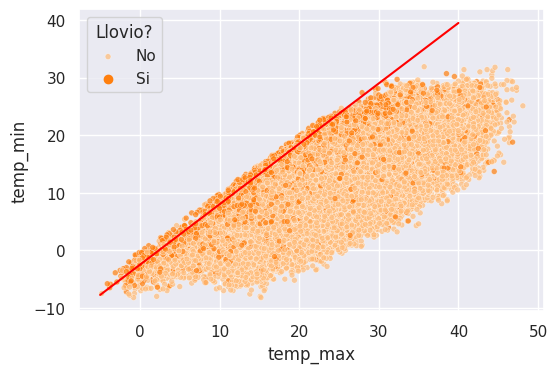

In [33]:
x = np.linspace(-5, 40, 3)
y = 1.05*x - 2.5
graficar_scatter(('temp_max', 'temp_min'), df, (x, y))

In [34]:
cant_no = len(df[(df.temp_min > 1.05*df.temp_max - 2.5) & (df[variable_target] == 0)])
cant_si = len(df[(df.temp_min > 1.05*df.temp_max - 2.5) & (df[variable_target] == 1)])

print(f"Cantidad de samples positivos por encima de la recta: {cant_si}")
print(f"Cantidad de samples negativos por encima de la recta: {cant_no}")
print(f"Relacion: {cant_si/cant_no : .2f}")

Cantidad de samples positivos por encima de la recta: 515
Cantidad de samples negativos por encima de la recta: 103
Relacion:  5.00


Para las temperaturas máximas y mínimas, tenemos una relación similar a la anterior: **cuando la temperatura mínima se encuentra por encima de esa recta, hay más samples que llueven al día siguiente que los que no.** 

En este caso, esto es cuando la temperatura máxima y mínima del día son muy próximas.

## ¿Cómo varían las features categóricas cuando llueve al día siguiente?

### Barrio

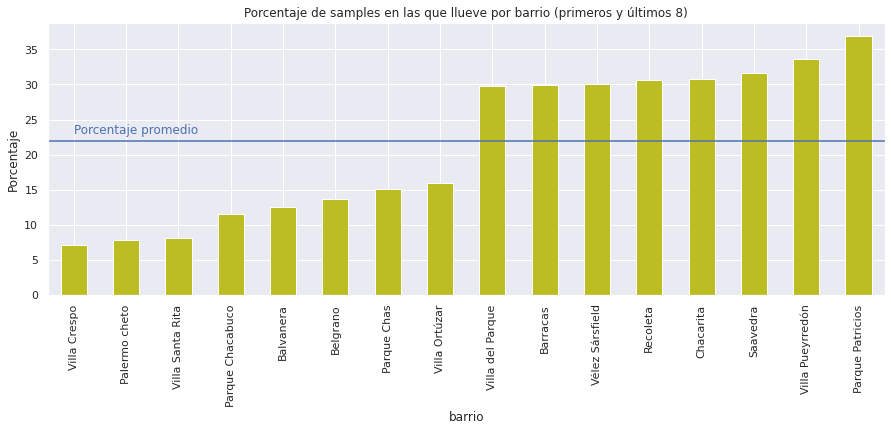

In [35]:
perc = (df.groupby("barrio").agg("mean")[variable_target]*100).to_frame().sort_values(by=variable_target)

perc = perc.head(8).append(perc.tail(8))

ax = perc.plot(kind="bar", color = get_par_colores("barrio")[0], legend = "")
ax.set_ylabel("Porcentaje")
ax.set_title("Porcentaje de samples en las que llueve por barrio (primeros y últimos 8)")
plt.gcf().set_size_inches(15, 5)
plt.axhline(22) # El que calculamos antes en el gráfico torta
plt.text(0, 23, "Porcentaje promedio", color = 'C0')
plt.show()

Podemos ver en el gráfico que los 5 barrios con lluvia más frecuente no nos ofrecen mucha información ya que siguen siendo menor a 50% por bastante, por lo que el target no sucede con mucha más frecuencia.
De todas formas, si podemos tomar por la negativa y mirar los menos frecuentes. **Solo el ~7% de las mediciones en Villa Crespo llueven hamburguesas al día siguiente**, con lo cual podemos descartar que llueva si es en ese barrio.

# Baseline

In [36]:
def llueve(row, resultado):
    ret = 0
    if row['horas_de_sol'] <= 1:
        ret = 1
    if row['humedad_tarde'] >= 80:
        ret = 1
    # Descartamos este resultado ya que bajaba el accuracy, probablemente se deba a que
    # ya capturamos la mayoría de los positivos de ese resultado con otras condiciones,
    # y la diferencia de casos positivos y negativos con esa condición no era tan significante
    
    #if row['nubosidad_tarde'] == 8:
    #    ret = 1
    if row['presion_atmosferica_temprano'] <= 1000:
        ret = 1

    # Esta era la columna con números inválidos, esta función los transforma en NaN
    if pd.to_numeric(row['presion_atmosferica_tarde'], errors='coerce') <= 1000:
        ret = 1

    if row['rafaga_viento_max_velocidad'] >= 80:
        ret = 1
    if 1.2*row['temperatura_tarde'] - 2 < row['temperatura_temprano']:
        ret = 1
    if 1.05*row['temp_max'] - 2.5 < row['temp_min']:
        ret = 1
    if row['mm_lluvia_dia'] >= 30:
        ret = 1
 
    if row['barrio'] == "Villa Crespo":
        ret = 0
    if row['horas_de_sol'] >= 8:
        ret = 0
    if row['nubosidad_tarde'] == 0:
        ret = 0
    if row['humedad_tarde'] < 60:
        ret = 0
 
    resultado.append(ret)

def baseline(dataframe):
    dataframe = dataframe.replace({variable_target : {"si" : 1, "no" : 0}})
    resultado = []
    dataframe.apply(lambda row: llueve(row, resultado), axis=1)
    return resultado

df_con_target = df_original[~df_original[variable_target].isna()]
resultado_baseline = baseline(df_con_target)
correctos = 0
falsos_positivos = 0
for i, x in enumerate(df_con_target[variable_target].tolist()):
    if (x == 'si' and resultado_baseline[i] == 1) or (x == 'no' and resultado_baseline[i] == 0):
        correctos += 1
    if x == 'no' and resultado_baseline[i] == 1:
        falsos_positivos += 1

print(f"Porcentaje correctos: {correctos/len(resultado_baseline)*100 : .2f}%")
print(f"Porcentaje de falsos positivos entre los incorrectos: {100*falsos_positivos/(len(resultado_baseline)-correctos) : .2f}%")
print(f"Cantidad de falsos positivos: {falsos_positivos}")
cant_pos = len(df_con_target[df_con_target[variable_target] == 'si'])
print(f"Porcentaje de positivos detectados: {100*(resultado_baseline.count(1) - falsos_positivos)/cant_pos :.2f}%")

Porcentaje correctos:  82.74%
Porcentaje de falsos positivos entre los incorrectos:  20.61%
Cantidad de falsos positivos: 4045
Porcentaje de positivos detectados: 38.78%


Como vimos que nos faltaban bastantes positivos por detectar, probamos a ser mas flexibles con los datos de la fila **mm_lluvia_dia**, tomando todos los que sean $>= 5$, y para no tomar tantos falsos positivos restringimos un poco más **humedad_tarde**, dando por negativos a los $< 70$. Haciendo esos cambios se llega a un accuracy de $\approx 83\%$